In [78]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')

In [5]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
# 데이터프레임의 describe() 명령어를 사용하여 수치형 데이터를 포함한 컬럼에 대해서만 
# 요약 값을 출력합니다. 총 878,049개의 학습데이터 셋이 있고, X좌표 Y좌표의 
# 최소값, 최대값, 4분위수 등을 확인할 수 있습니다.​
train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
# 데이터프레임의 info() 명령어를 사용하여 각 컬럼의 데이터 타입과 개수를 확인 할 수 있습니다. X,Y를 제외한 컬럼값이 모두 object 타입입니다. 
# 기계학습을 위해서 사용이 필요한 변수들은 수치형데이터로 변환하는 작업이 필요합니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [8]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [10]:
train['Dates'] = train['Dates'].astype('datetime64')
# 범죄 사건 발생 날짜 및 시간 정보를 포함한 'Dates'필드의 값을 연도별, 월별, 일별, 시간별로 분석하기 위해서 
# datetime64타입으로 변환합니다.
# 문자열 파싱을 해서 분석할 수도 있지만, datetime64 타입으로 변환하면 
# 파이썬 내장함수를 사용해서 쉽게 연/월/일/시간별 값을 얻어올 수 있습니다.​

In [16]:
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute

In [21]:
train['X+Y'] = train['X']+train['Y']
train['X-Y'] = train['X']-train['Y']

In [35]:
train['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x:x.days)
test['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x:x.days)
# 각 날짜 값에서 날짜 값 중 가장 작은 값(dt.date.min())의 차이를 구하여 
# 일(days) 형태로 표시합니다.

​

In [36]:
y = train['Category']

In [ ]:
# 범죄 사건 발생 날짜 및 시간 정보를 포함한 'Dates'필드의 값을 연도별, 월별, 일별, 시간별로 
# 분석하기 위해서 datetime64타입으로 변환합니다.
#  문자열 파싱을 해서 분석할 수도 있지만,  datetime64 타입으로 변환하면 파이썬 내장함수를 사용해서 
# 쉽게 연/월/일/시간별 값을 얻어올 수 있습니다.

In [39]:
train['year'].value_counts().sort_index()
# .sort_index()는 연도순대로 출력하기 위해 호출하였습니다. 
# groupby()를 사용하는 방법은 아래, 월별 범죄횟수를 출력할 때 확인해보겠습니다.​

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: year, dtype: int64

In [40]:
train['month'].value_counts().sort_index()

1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: month, dtype: int64

In [41]:
# groupby를 사용하는 방법
# value_counts랑 사실상 같다.
train.groupby('month').size()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
dtype: int64

In [43]:
train['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [44]:
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [46]:
# null값이 포함된 데이터 필드가 있는지 확인하기
train.isnull().any().sum()
# 필드 중에 하나라도 any가 있으면 null로 반환

0

In [ ]:
train.drop(['Dates', 'Category', 'Descript',' DayOfWeek', 'Resolution'])
# 모델 생성시 불필요한 컬럼은 삭제합니다. 
# drop 명령어를 실행할 경우, train 데이터프레임에 값이 삭제되지 않으므로,
#  다시 drop 변수에 재할당하도록 합니다.
#  또는 inplace = true 옵션을 사용하여 삭제된 값이 변수에 적용되도록 합니다.​

---

<AxesSubplot:xlabel='month'>

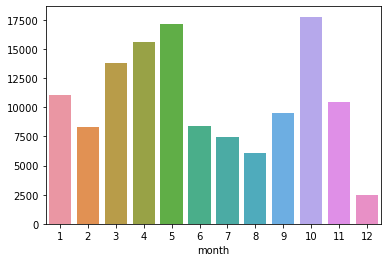

In [71]:
sns.barplot(x=train.groupby('month').size().index,
 y=train.groupby('month').size().values - 62500)

In [73]:
# sns.barplot(x=train.groupby('year').size().index,
#  y=train.groupby('year').size().values() - 40000)


<AxesSubplot:xlabel='day'>

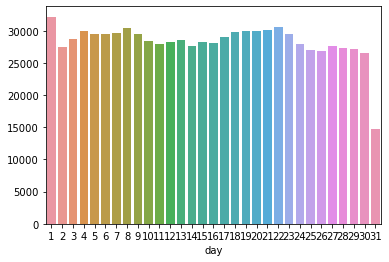

In [69]:
sns.barplot(x=train.groupby('day').size().index, 
y=train.groupby('day').size().values)

<AxesSubplot:xlabel='dayofweek'>

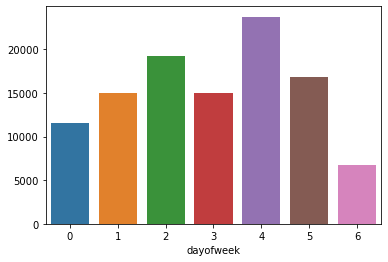

In [74]:
sns.barplot(x=train.groupby('dayofweek').size().index,
 y=train.groupby('dayofweek').size().values - 110000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'ARSON'),
  Text(1, 0, 'ASSAULT'),
  Text(2, 0, 'BAD CHECKS'),
  Text(3, 0, 'BRIBERY'),
  Text(4, 0, 'BURGLARY'),
  Text(5, 0, 'DISORDERLY CONDUCT'),
  Text(6, 0, 'DRIVING UNDER THE INFLUENCE'),
  Text(7, 0, 'DRUG/NARCOTIC'),
  Text(8, 0, 'DRUNKENNESS'),
  Text(9, 0, 'EMBEZZLEMENT'),
  Text(10, 0, 'EXTORTION'),
  Text(11, 0, 'FAMILY OFFENSES'),
  Text(12, 0, 'FORGERY/COUNTERFEITING'),
  Text(13, 0, 'FRAUD'),
  Text(14, 0, 'GAMBLING'),
  Text(15, 0, 'KIDNAPPING'),
  Text(16, 0, 'LARCENY/THEFT'),
  Text(17, 0, 'LIQUOR LAWS'),
  Text(18, 0, 'LOITERING'),
  Text(19, 0, 'MISSING PERSON'),
  Text(20, 0, 'NON-CRIMINAL'),
  Text(21, 0, 'OTHER OFFENSES'),
  Text(22, 0, 'PORNOGRAPHY/OBSCENE MAT'),
  Text(23, 0, 'PROSTITUTION'),
  Text(24, 0, 'RECOVERED VEHICLE'),
  Text(25, 0, 'ROBBERY'),
  Text(26, 0, '

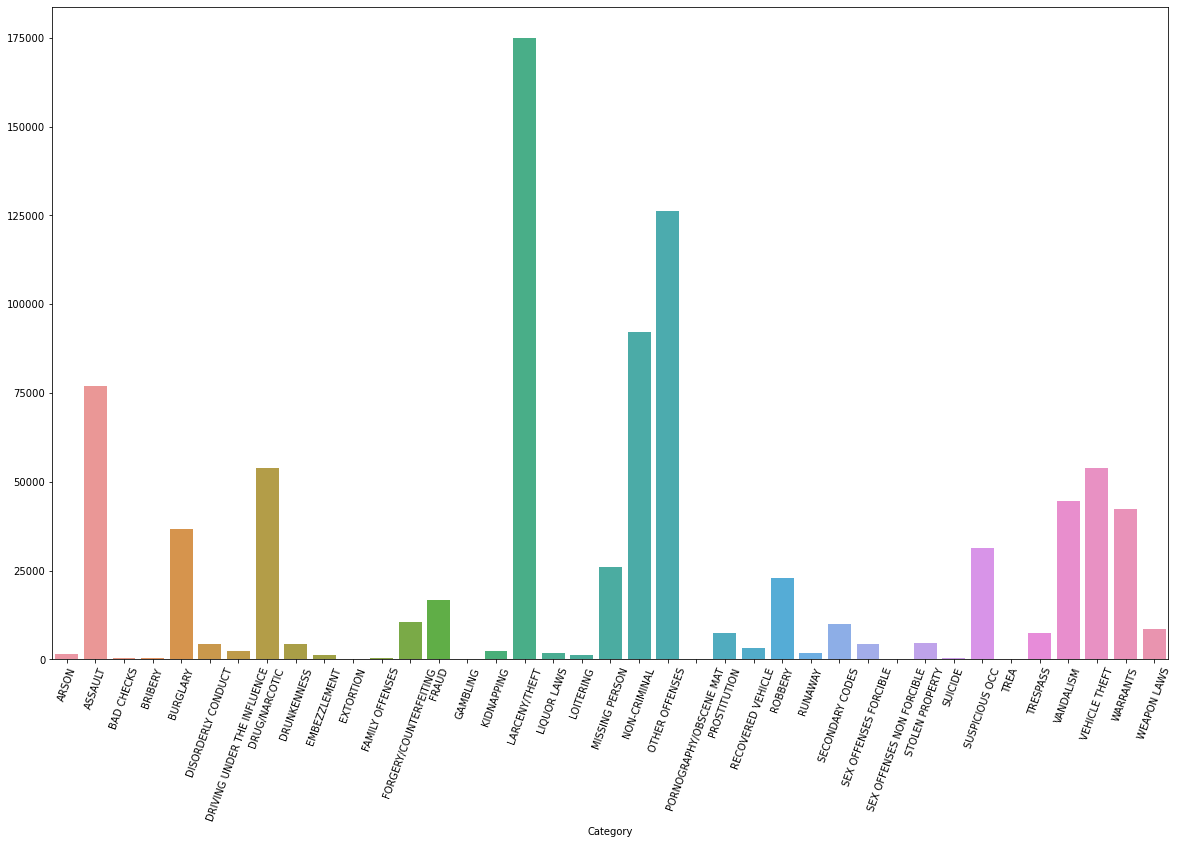

In [77]:
plt.subplots(figsize = (20, 12))
sns.barplot(x=train.groupby('Category').size().index,
y=train.groupby('Category').size().values)
plt.xticks(rotation=70)

---

In [79]:
x_train, x_valid, y_train, y_valid = train_test_split(train, y, test_size=0.2,
random_state = 5, stratify = y)
# 사이킷런에서 제공하는 train_test_split 메소드를 사용하여 
# 학습용 데이터와 테스트용 데이터 셋을 분리합니다.​